# Clustering a più dimensioni su dati generati utilizzando un algoritmo Gaussian Mixture 

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import os
                                            
file = open("dim2.txt")
line = file.readlines()
n_samples = len(line)
n_features = len(line[0].split())
X= np.zeros((n_samples,n_features))

for i in range(n_samples):
    row = line[i].split()
    for j in range(n_features):
        X[i][j]= int(row[j]) 

X



array([[0.00000e+00, 4.00871e+05],
       [1.25000e+02, 3.98530e+05],
       [4.91600e+03, 4.19677e+05],
       ...,
       [9.72578e+05, 8.62426e+05],
       [9.74573e+05, 8.51625e+05],
       [9.78207e+05, 8.56212e+05]])

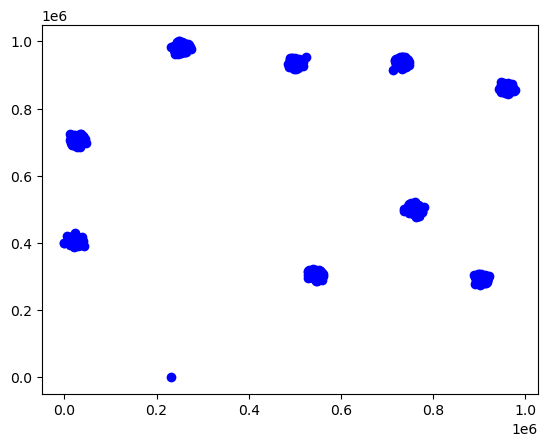

In [17]:
plt.scatter(X[:, 0], X[:, 1], c= "blue" )

In [59]:
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters,init = "random",random_state= 1, n_init=1)
kmeans

KMeans(init='random', n_clusters=9, n_init=1, random_state=1)

In [60]:
kmeans.fit(X)
y_pred= kmeans.predict(X)

print(y_pred)


[7 7 7 ... 6 6 6]


C:\Users\alega\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


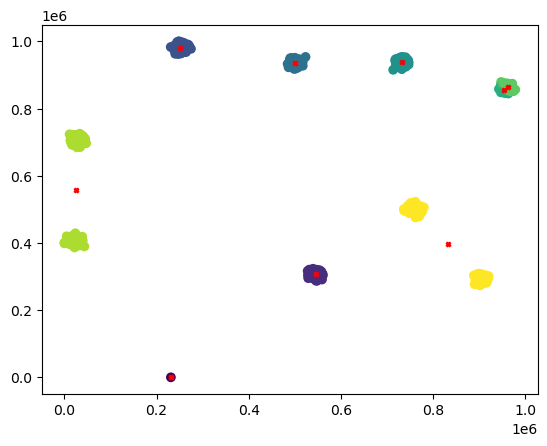

In [61]:
plt.scatter(X[:, 0], X[:, 1], c= y_pred )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='red', marker='X' )

In [53]:
opt = 0
for k in range(n_samples):
    for h in range(k, n_samples):      #k lo metto per nn far contare due volte la stessa distanza 
        if y_pred[k] == y_pred[h]:   
            #prift("ok")
            sum = 0
            for f in range(n_features):
                
                sum = sum +(X[h,f]-X[k,f])**2
                
            dist = np.sqrt(sum)    
            #print("distanza corrente = ", dist)
            opt = opt + dist

print("valore ottimo = ",opt)

valore ottimo =  13748279383.426414


## Algoritmo di euristica migliorativa locale 

### Metto a confronto la distanza del centroide di un cluster con tutti gli altri centroidi e vedo qual'è il cluster più vicino, faccio questo per ogni cluster 

In [22]:
coppie = np.zeros((n_clusters,2))

for i in range(n_clusters):
    dist= {}
    for j in range(n_clusters):
        sum = 0
        if i != j:
            for k in range(n_features):
                sum = sum + (kmeans.cluster_centers_[i,k]-kmeans.cluster_centers_[j,k])**2
               
            dist[j] = np.sqrt(sum)
    print(dist)
    
    coppie[i,0] = i 
    min_chiave = min(dist, key=dist.get)
    min_valore = dist[min_chiave]
    coppie[i,1] = min_chiave
    
    print(min_valore)
print(coppie)

{1: 245841.5935831904, 2: 234829.06434560535, 3: 357298.6635365294, 4: 669679.8491437124, 5: 887911.1916957616, 6: 662006.4149696983, 7: 438929.66535117, 8: 741688.3433648173}
234829.06434560535
{0: 245841.5935831904, 2: 11020.482434468388, 3: 597365.6299052065, 4: 569628.8289668194, 5: 1045312.4741967254, 6: 696451.0274190765, 7: 412807.3147984277, 8: 949000.1370229948}
11020.482434468388
{0: 234829.06434560535, 1: 11020.482434468388, 3: 586578.5437698825, 4: 572625.0875827045, 5: 1037816.727690701, 6: 693471.819338429, 7: 411281.3508721232, 8: 939511.5191451003}
11020.482434468388
{0: 357298.6635365294, 1: 597365.6299052065, 2: 586578.5437698825, 4: 850492.0338033185, 5: 655162.837139184, 6: 673423.4736431043, 7: 595960.9347262894, 8: 428349.26105474815}
357298.6635365294
{0: 669679.8491437124, 1: 569628.8289668194, 2: 572625.0875827045, 3: 850492.0338033185, 5: 889813.7400589936, 6: 363354.8113178218, 7: 255188.66966285824, 8: 970760.8691624682}
255188.66966285824
{0: 887911.1916957

### cerco di migliorare la funzione obbiettivo delle singole coppie di cluster 

In [23]:
def Calcolo_fobj(n_samples,n_features,X,y_pred):
    att1 = 0
    att2 = 0
    for k in range(n_samples):
        for h in range(k,n_samples):
            if y_pred[k] == 0 and y_pred[h] == 0:
                #prift("ok")
                sum = 0
                for f in range(n_features):
                    sum = sum +(X[h,f]-X[k,f])**2
                
                dist1 = np.sqrt(sum)    
            
                att1 = att1 + dist1 

             
            if y_pred[k] == 1 and y_pred[h] == 1:
                sum = 0
                for f in range(n_features):
                    sum = sum +(X[h,f]-X[k,f])**2
                
                dist2 = np.sqrt(sum)    
            
                att2 = att2 + dist2
    
    return att1 + att2
              
att=Calcolo_fobj(n_samples,n_features,X,y_pred)

print(att)


167679666.64678654


### scambio i primi n sample piu distanti dal centro dei due cluster approvando solo quelli che mi migliorano la funzione obbiettivo  

In [24]:


cluster_i = {}
cluster_j = {}

for i in range(n_samples):
    if y_pred[i]==0:
        cluster_i[i]= X[i]
    if y_pred[i]==2:
        cluster_j[i]= X[i]

 
print(cluster_i)
print(cluster_j)


    

{751: array([713296., 915171.]), 752: array([717657., 944689.]), 753: array([717850., 941860.]), 754: array([719009., 946771.]), 755: array([719296., 931689.]), 756: array([719664., 946958.]), 757: array([719722., 933623.]), 758: array([720238., 941641.]), 759: array([720383., 937134.]), 760: array([720507., 924126.]), 761: array([721365., 935990.]), 762: array([721798., 938522.]), 763: array([722624., 937197.]), 764: array([722859., 942467.]), 765: array([723036., 940038.]), 766: array([723441., 937970.]), 767: array([723468., 926775.]), 768: array([724142., 941963.]), 769: array([724167., 936261.]), 770: array([724199., 929074.]), 771: array([724448., 943763.]), 772: array([724655., 941549.]), 773: array([724724., 940549.]), 774: array([725033., 934405.]), 775: array([725215., 937801.]), 776: array([726006., 949901.]), 777: array([726250., 938098.]), 778: array([726269., 938359.]), 779: array([726421., 945692.]), 780: array([726735., 940686.]), 781: array([726874., 937985.]), 782: ar

In [25]:



def opt_clust(cluster_i,n_features):
    index_i= cluster_i.keys()

    att1=0
    for k in index_i:
        for h in index_i:
        
            sum1 = 0
            for f in range(n_features):
                sum1 = sum1 +(cluster_i[k][f]-cluster_i[h][f])**2
                
            dist1 = np.sqrt(sum1)    
          
            att1 = att1 + dist1  
    

    att1 = att1/2
    return att1

att_obj1 = opt_clust(cluster_i,n_features)
att_obj2 = opt_clust(cluster_j,n_features)

print(att_obj1)
print(att_obj2)


139278469.04270765
23885327.793469533


In [26]:
vett_dist1 = {}
vett_dist2 = {}
index_i= cluster_i.keys()
index_j= cluster_j.keys()

for k in index_i:
        sum1 = 0
        for f in range(n_features):
            sum1 = sum1 +(cluster_i[k][f]-kmeans.cluster_centers_[0][f])**2
                
        dist1 = np.sqrt(sum1)
        vett_dist1[dist1] = k


#lista_ord = sorted(vett_dist1.items(),key = lambda x: x[1], reverse = True)

print(vett_dist1)


for k in index_j:
        sum2 = 0
        for f in range(n_features):
            sum2 = sum2 +(cluster_j[k][f]-kmeans.cluster_centers_[0][f])**2
                
        dist2 = np.sqrt(sum2)
        vett_dist2[dist2] = k


#lista_ord = sorted(vett_dist1.items(),key = lambda x: x[1], reverse = True)

print(vett_dist2)

{31102.75797287667: 751, 15708.13426644623: 752, 14844.396553560775: 753, 15291.2598312251: 754, 15422.514772868939: 755, 14807.328924985277: 756, 14136.324529359192: 757, 12451.547409031893: 758, 12392.647398600198: 759, 19606.542166651656: 760, 11734.104890135375: 761, 10781.986295639957: 762, 10191.870938450615: 763, 10076.254497217953: 764, 9497.413524360374: 765, 9231.436705773493: 766, 15714.918002098955: 767, 8703.94183494117: 768, 9006.202669977036: 769, 13434.4995748271: 770, 9077.665886451245: 771, 8102.563131876183: 772, 7855.479032244851: 773, 9126.521262016224: 774, 7531.612379787624: 775, 12174.728237324776: 776, 6455.646322357762: 777, 6380.59107183952: 778, 8610.482931832401: 779, 5886.7986183244775: 780, 5881.40688605811: 781, 6642.56078728001: 782, 5026.11621559898: 783, 11886.84645477368: 784, 12523.481986493684: 785, 5765.466526313644: 786, 4829.740125449048: 787, 10103.215573900921: 788, 5483.632251167412: 789, 4478.562063807189: 790, 10378.49651921614: 791, 13002.

In [27]:
sorted_vet1 = sorted(vett_dist1.items(), reverse =True)
sorted_vet2 = sorted(vett_dist2.items(), reverse =True)

print(sorted_vet1)
print(sorted_vet2)
   

[(31102.75797287667, 751), (22477.76927839357, 819), (19606.542166651656, 760), (18683.704384285407, 842), (17290.84422151524, 885), (16695.24467543727, 906), (16238.275010994888, 845), (15714.918002098955, 767), (15708.13426644623, 752), (15422.514772868939, 755), (15291.2598312251, 754), (15093.780100847078, 881), (14844.396553560775, 753), (14807.328924985277, 756), (14163.97735852193, 905), (14136.324529359192, 757), (14008.034464051492, 904), (13634.551556959706, 899), (13456.107149768743, 900), (13434.4995748271, 770), (13410.943108747188, 812), (13149.852741357552, 838), (13002.728993537621, 792), (12945.329946074036, 829), (12856.318704800053, 877), (12735.42210265233, 890), (12523.481986493684, 785), (12515.219636881324, 892), (12508.900657241036, 893), (12466.961168333019, 897), (12451.547409031893, 758), (12439.58080105822, 853), (12392.647398600198, 759), (12247.940206665173, 886), (12247.751929750306, 827), (12174.728237324776, 776), (11886.84645477368, 784), (11734.104890

## Cambio euristica migliorativa


In [28]:
def swap(clust_i,clust_j,key1,key2):
    value1 = clust_i.pop(key1)
    value2 = clust_j.pop(key2)
    clust_i[key2] = value2
    clust_j[key1] = value1








In [29]:
new_att = 0
new_clust_i = cluster_i.copy()
new_clust_j = cluster_j.copy()



for k in range(100):
    temp_clust_i = new_clust_i.copy()
    temp_clust_j = new_clust_j.copy()
    key1 = sorted_vet1[k][1]
    key2 = sorted_vet2[k][1]
    swap(temp_clust_i,temp_clust_j,key1,key2)
    temp_tot1 = opt_clust(temp_clust_i,n_features)
    temp_tot2 = opt_clust(temp_clust_j,n_features)
    sum_temp_tot = temp_tot1+temp_tot2
    new_tot1 = opt_clust(new_clust_i,n_features)
    new_tot2 = opt_clust(new_clust_j,n_features)
    sum_new_tot = new_tot1+new_tot2
    print(sum_temp_tot, " ", sum_new_tot)
    if sum_temp_tot < sum_new_tot :
        print(" scambio " , key1 ," e ", key2) 
        swap(new_clust_i,new_clust_j,key1,key2)




        

    

210597157.84351432   163163796.83617717
210816695.6494552   163163796.83617717
211971422.7421266   163163796.83617717
211001461.01758203   163163796.83617717
211040938.52224267   163163796.83617717
210818633.6451215   163163796.83617717
211477493.54037315   163163796.83617717
212158280.75389507   163163796.83617717
212833571.9118511   163163796.83617717
212770130.78550318   163163796.83617717
213092187.06544742   163163796.83617717
212000381.98716232   163163796.83617717
213124227.88516304   163163796.83617717
213107041.42464513   163163796.83617717
211240008.41389784   163163796.83617717
212382995.90734196   163163796.83617717
211113787.05128384   163163796.83617717
211271903.1002506   163163796.83617717
211079981.37250125   163163796.83617717
212322333.08390653   163163796.83617717
212567066.90323275   163163796.83617717
212415912.30562153   163163796.83617717
212596825.18799353   163163796.83617717
212367431.474945   163163796.83617717
212038077.94109946   163163796.83617717
2113336

IndexError: list index out of range

In [ ]:
tot1 = opt_clust(new_clust_i)
tot2 = opt_clust(new_clust_j)

print(tot1+tot2)